# Importing Standard libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

# Loading-in data and exploring the rows and columns

In [2]:
df = pd.read_csv('cleaned_automobile.csv')
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,Car Size
0,0,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,...,5000.0,21.0,27.0,13495.0,11.190476,9.370370,low,0,1,0.589311
1,1,3,121,alfa-romero,std,two,convertible,rwd,front,88.6,...,5000.0,21.0,27.0,16500.0,11.190476,9.370370,low,0,1,0.589311
2,2,1,121,alfa-romero,std,two,hatchback,rwd,front,94.5,...,5000.0,19.0,26.0,16500.0,12.368421,9.730769,medium,0,1,0.655799
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,5500.0,24.0,30.0,13950.0,9.791667,8.433333,low,0,1,0.708505
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,5500.0,18.0,22.0,17450.0,13.055556,11.500000,low,0,1,0.710645


In [3]:
df.tail()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,Car Size
220,220,0,121,gmc,std,four,sedan,fwd,front,105.8,...,5400.0,23.0,28.0,10345.0,10.217391,9.035714,low,0,1,0.777560
221,221,-1,121,gmc,std,two,hatchback,fwd,front,98.4,...,5400.0,23.0,28.0,8238.0,10.217391,9.035714,low,0,1,0.766652
222,222,0,121,kia,std,four,sedan,fwd,front,100.4,...,5000.0,25.0,31.0,7975.0,9.400000,8.161290,low,0,1,0.741356
223,223,1,121,kia,std,four,wagon,fwd,front,102.4,...,5000.0,24.0,29.0,8189.0,9.791667,8.724138,low,0,1,0.773579
224,224,2,102,kia,std,two,hatchback,rwd,front,95.3,...,5000.0,26.0,31.0,9295.0,9.038462,8.161290,low,0,1,0.614650


# Selecting features and slicing the data

In [4]:
# Select features for PCA
selected_features = ["engine-size", "horsepower", "curb-weight", "city-mpg", "highway-mpg", "price"]

# Slice data to include only the selected features
df_selected = df[selected_features]

# Separate price from the features
X = df_selected.drop("price", axis=1)
y = df_selected["price"]
X.head()

,engine-size,horsepower,curb-weight,city-mpg,highway-mpg
0,130.0,111.0,2548.0,21.0,27.0
1,130.0,111.0,2548.0,21.0,27.0
2,152.0,154.0,2823.0,19.0,26.0
3,109.0,102.0,2337.0,24.0,30.0
4,136.0,115.0,2824.0,18.0,22.0


### Selected Features

These are selected features chosen for our analysis. These features play a crucial role in predicting the price of a vehicle.

1. **Engine Size**:
   - Engine size refers to the capacity of the vehicle's engine. It is an important factor as larger engines tend to be associated with more powerful and often more expensive vehicles.

2. **Horsepower**:
   - Horsepower represents the engine's power output and is a measure of the vehicle's performance.Vehicles with higher horsepower are generally considered more powerful and often come with a higher price tag.

3. **Curb Weight**:
   - Curb weight is the total weight of a vehicle, including all standard equipment and a full tank of fuel, but excluding passengers and cargo.

4. **City MPG (Miles Per Gallon)**:
   - City MPG measures a vehicle's fuel efficiency in urban driving conditions.

5. **Highway MPG (Miles Per Gallon)**:
   - Highway MPG measures a vehicle's fuel efficiency on the open road, typically at higher speeds than city driving.
   - Higher highway MPG values are often associated with more fuel-efficient vehicles, which can be attractive to buyers.

6. **Price (Target Variable)**:
   - Price is the variable we aim to predict.

We have  chosen because they are known to influence the price of a vehicle significantly. By considering these features, aim is to build a predictive model that can help us understand and estimate the price of automobiles more accurately.

# Standardizing the data

In [5]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

#Create a Df with  standardized data
df_standardized = pd.DataFrame(data=X_standardized, columns=X.columns)

# Display the first few rows of the standardized data for verification
display(df_standardized.head())

,engine-size,horsepower,curb-weight,city-mpg,highway-mpg
0,0.066499,0.221029,-0.000350,-0.672345,-0.549355
1,0.066499,0.221029,-0.000350,-0.672345,-0.549355
2,0.626309,1.432837,0.555078,-1.000497,-0.704055
3,-0.467865,-0.032605,-0.426515,-0.180119,-0.085257
4,0.219174,0.333756,0.557098,-1.164572,-1.322853


# Perform PCA

In [6]:
from sklearn.decomposition import PCA

# Apply PCA to  standardized feature data
num_components = 5
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_standardized)

comp_names = [f'PC{i}' for i in range(1, num_components + 1)]
# Create DataFrame from X_pca
pca_df = pd.DataFrame(data=X_pca, columns=comp_names)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.686133,-0.551695,0.056650,0.153993,-0.071042
1,0.686133,-0.551695,0.056650,0.153993,-0.071042
2,1.939895,-0.178554,0.570554,-0.340712,-0.115723
3,-0.282266,-0.577097,0.165458,-0.035309,-0.015803
4,1.626209,-0.865322,-0.363601,0.205656,0.090095


In [7]:
# Calculate eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

In [8]:
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.82374216, 0.09976665, 0.05262345, 0.01919841, 0.00466933])

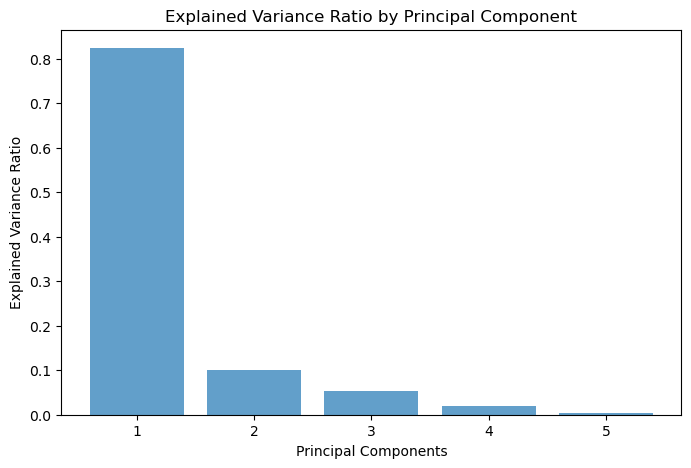

In [9]:
# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_components + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

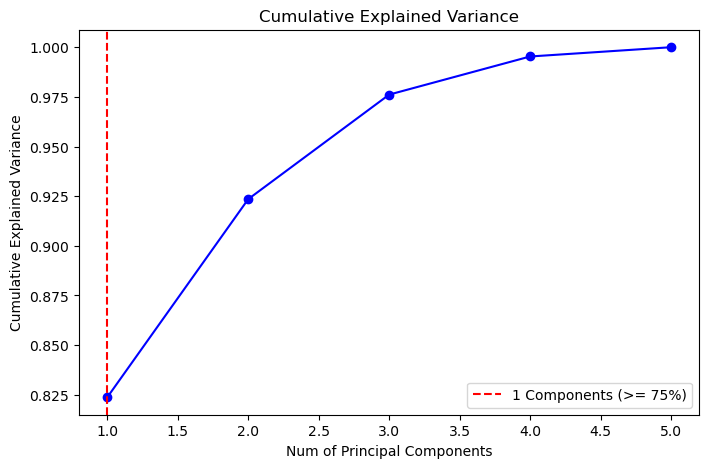

In [13]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components needed to explain at least 75% of the variance
num_components_needed = np.argmax(cumulative_explained_variance >= 0.75) + 1

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.xlabel('Num of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axvline(x=num_components_needed, color='r', linestyle='--', label=f'{num_components_needed} Components (>= 75%)')
plt.legend()
plt.show()

In [14]:
cumulative_threshold = 0.75
num_components_needed = np.argmax(cumulative_explained_variance >= cumulative_threshold) + 1

selected_components = pca_df.iloc[:, :num_components_needed] # or just type in num_components_needed as 1
selected_components

,PC1
0,0.686133
1,0.686133
2,1.939895
3,-0.282266
4,1.626209
...,...
220,0.592711
221,0.265809
222,-0.033763
223,0.282083


# Loadings

In [15]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=comp_names,  # the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
engine-size,0.430249,0.617838,0.188309,0.626750,-0.069898
horsepower,0.453301,0.060397,0.678969,-0.560978,0.123187
curb-weight,0.438628,0.356448,-0.687955,-0.451928,-0.055044
city-mpg,-0.453664,0.527669,0.016437,-0.135033,0.705159
highway-mpg,-0.459563,0.457316,0.173174,-0.264603,-0.692575


Looking at analysis of principal components:

- **Engine Size** - is a strong predictor that positively influences the price of a vehicle.

- **Horsepower** -  Higher horsepower is associated with higher vehicle prices.

These features together can predict approximately 75% of the price of a vehicle.